# Cantidad de BTC

In [1]:
# Original block reward for miners was 50 BTC
start_block_reward = 50

# 210,000 blocks ≈ every 4 years with a 10-minute block interval
reward_interval = 210000

def max_money():
    # 50 BTC = 50 * 100,000,000 satoshis
    current_reward = start_block_reward * 10**8
    total = 0

    while current_reward > 0:
        total += reward_interval * current_reward
        current_reward //= 2  # integer division, halve the reward

    return total

In [2]:
print(f"Total BTC to ever be created: {max_money()} satoshis")
print(f"In BTC: {max_money() / 10**8} BTC")

Total BTC to ever be created: 2099999997690000 satoshis
In BTC: 20999999.9769 BTC


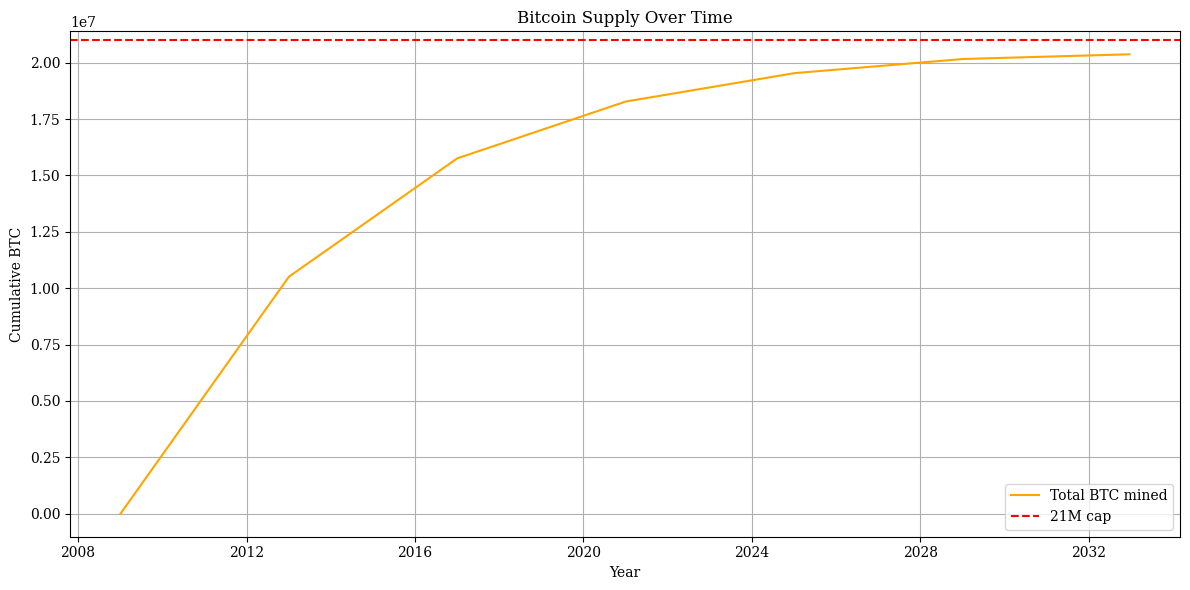

In [10]:
import matplotlib.pyplot as plt
import datetime

# Bitcoin genesis block: 3 Jan 2009
genesis_date = datetime.datetime(2009, 1, 3)
block_time = 10 * 60  # 10 minutes in seconds


def bitcoin_supply_schedule(max_blocks=70000000):
    """Return (dates, blocks, supply) for bitcoin issuance schedule."""
    current_reward = start_block_reward
    total = 0
    supply = []
    blocks = []
    dates = []

    block = 0
    while current_reward > 0 and block <= max_blocks:
        for i in range(reward_interval):
            if block > max_blocks:
                break
            total += current_reward
            blocks.append(block)
            supply.append(total)
            block_date = genesis_date + datetime.timedelta(seconds=block * block_time)
            dates.append(block_date)
            block += 1
        current_reward //= 2  # Halving
    return dates, blocks, supply


# Generate data
dates, blocks, supply = bitcoin_supply_schedule()

# Convert supply from BTC units
plt.figure(figsize=(12, 6))
plt.plot(dates, supply, label="Total BTC mined", color="orange")

plt.axhline(21_000_000, color="red", linestyle="--", label="21M cap")
plt.title("Bitcoin Supply Over Time")
plt.xlabel("Year")
plt.ylabel("Cumulative BTC")
plt.legend()
plt.grid(True)

plt.show()